In [1]:
import pandas as pd

file_path = "E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CSE-CIC-IDS2018\\02-20-2018.csv"

# Read file in chunks
chunk_size = 100000  # Adjust based on available memory
chunks = []

for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False):
    # Filter only TLS traffic while reading
    tls_chunk = chunk[(chunk['Dst Port'].isin([443, 993, 995, 8443])) & (chunk['Protocol'] == 6)]
    
    # Append filtered chunk
    chunks.append(tls_chunk)

# Combine all chunks into one DataFrame
tls_traffic = pd.concat(chunks, ignore_index=True)

print("Total TLS traffic extracted:", tls_traffic.shape)

# Save the filtered TLS dataset as a smaller CSV file
tls_traffic.to_csv("E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CSE-CIC-IDS2018\\tls_traffic_filtered.csv", index=False)

print("Filtered dataset saved successfully!")

Total TLS traffic extracted: (1221100, 84)
Filtered dataset saved successfully!


TLS Traffic Label Distribution:
Benign    1221100
Name: Label, dtype: int64


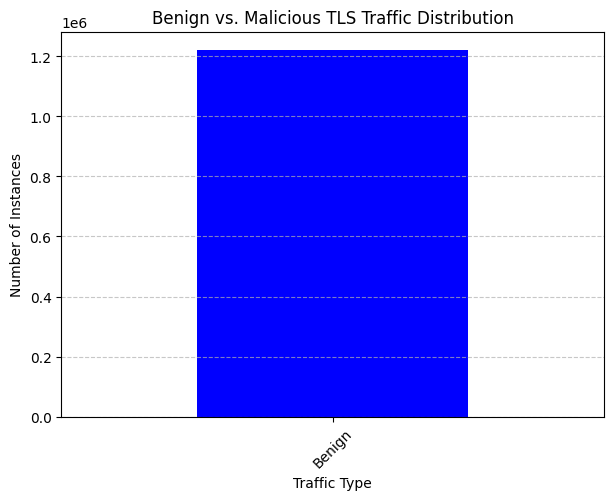

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the filtered TLS dataset
file_path = "E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CSE-CIC-IDS2018\\tls_traffic_filtered.csv"
tls_traffic = pd.read_csv(file_path)

# Check label distribution (Benign vs. Malicious)
label_counts = tls_traffic['Label'].value_counts()

# Print counts
print("TLS Traffic Label Distribution:")
print(label_counts)

# Plot bar chart
plt.figure(figsize=(7, 5))
label_counts.plot(kind='bar', color=['blue', 'red'])
plt.xlabel("Traffic Type")
plt.ylabel("Number of Instances")
plt.title("Benign vs. Malicious TLS Traffic Distribution")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [2]:
import pandas as pd

# Load and combine the three datasets
files = [
    "E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CSE-CIC-IDS2018\\02-20-2018.csv",
    "E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CSE-CIC-IDS2018\\02-23-2018.csv",
    "E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CSE-CIC-IDS2018\\03-02-2018.csv"
]

df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

print(df.shape)
print(df.head())

(10045898, 84)
                                  Flow ID          Src IP  Src Port  \
0  172.31.69.25-94.231.103.172-22-45498-6  94.231.103.172   45498.0   
1                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1       0.0   
2                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1       0.0   
3                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1       0.0   
4                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1       0.0   

         Dst IP  Dst Port  Protocol            Timestamp  Flow Duration  \
0  172.31.69.25        22         6  20/02/2018 08:34:07         888751   
1       8.0.6.4         0         0  20/02/2018 08:33:22      112642816   
2       8.0.6.4         0         0  20/02/2018 08:36:11      112642712   
3       8.0.6.4         0         0  20/02/2018 08:39:00      112642648   
4       8.0.6.4         0         0  20/02/2018 08:41:49      112642702   

   Tot Fwd Pkts  Tot Bwd Pkts  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0            11           

In [6]:
# Extract all attack traffic first
malicious_all = df[df['Label'] != 'Benign']

# Check which ports malicious traffic is using
print(malicious_all['Dst Port'].value_counts().head(20))  # Show top 20 ports used

80       576601
8080     281634
0           279
500         130
50891         6
50906         6
50899         6
50895         6
50896         6
51007         5
51301         5
51302         5
51291         5
51299         5
51011         5
51002         5
51298         5
51017         5
51297         5
51023         5
Name: Dst Port, dtype: int64


Filtered TLS traffic saved successfully at: E:\Studies\IIT\4 - Forth Year\Final Year Project\Datasets\CSE-CIC-IDS2018\tls_traffic_sample.csv

Label Distribution:
 Benign    1449846
Name: Label, dtype: int64


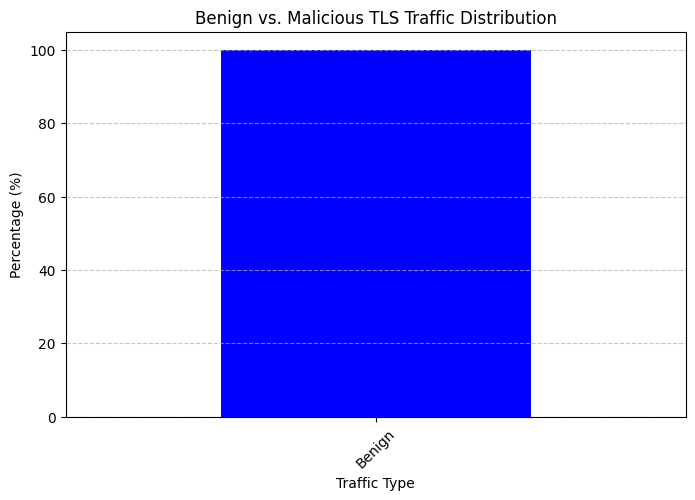

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Define TLS ports
tls_ports = [443, 993, 995, 8443]

# Filter only TLS traffic (Protocol 6 = TCP)
tls_traffic = df[(df['Dst Port'].isin(tls_ports)) & (df['Protocol'] == 6)]

# Check label distribution
label_counts = tls_traffic['Label'].value_counts()
total = label_counts.sum()

# Calculate percentage
label_percentages = (label_counts / total) * 100

# Save the filtered dataset as a new CSV file
output_path = "E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CSE-CIC-IDS2018\\tls_traffic_sample.csv"
tls_traffic.to_csv(output_path, index=False)

print(f"Filtered TLS traffic saved successfully at: {output_path}")
print("\nLabel Distribution:\n", label_counts)

# Plot label distribution
plt.figure(figsize=(8, 5))
label_percentages.plot(kind='bar', color=['blue', 'red', 'green'])
plt.xlabel("Traffic Type")
plt.ylabel("Percentage (%)")
plt.title("Benign vs. Malicious TLS Traffic Distribution")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [3]:
# Define TLS ports
tls_ports = [443, 993, 995, 8443]

# Filter only TLS traffic (Protocol 6 = TCP)
tls_traffic = df[(df['Dst Port'].isin(tls_ports)) & (df['Protocol'] == 6)]

# Save the filtered dataset as a new CSV file
output_path = "E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CSE-CIC-IDS2018\\tls_traffic_sample.csv"
tls_traffic.to_csv(output_path, index=False)

print(f"Filtered TLS traffic saved successfully at: {output_path}")


Filtered TLS traffic saved successfully at: E:\Studies\IIT\4 - Forth Year\Final Year Project\Datasets\CSE-CIC-IDS2018\tls_traffic_sample.csv
